# **About Project And Dataset** 😊⭐


In this project, we classify stars based on their spectral and astronomical properties to determine whether they are dwarfs or giants. We use a dataset that contains a set of properties that help accurately determine a star's classification,Stars are classified using the following properties:

-Vmag -> Visual Apparent Magnitude of the Star

-Plx -> Distance Between the Star and the Earth

-e_Plx -> Standard Error of Plx (Drop the Row if you find the e_Plx is too high!)

-B-V ->  B-V color index. (A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. Other stars are somewhere in between.)



-SpType -> Spectral type

-Amag -> Absolute Magnitude of the Star

-TargetClass -> Whether the Star is Dwarf (0) or Giant (1)

# **Import the necessary libraries** 💻

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, precision_recall_fscore_support
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.svm as svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# **Load the data** ⏳

In [ ]:
ds = pd.read_csv('/content/Star39552_balanced.csv')

In [ ]:
ds.head(9)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
5,6.09,6.02,0.95,0.040,B8IVn,14.987983,1
6,7.94,5.36,0.61,1.066,K0III,16.585825,0
7,6.81,13.13,1.04,1.030,K1III,17.401323,0
8,7.68,0.66,0.62,0.013,B2V:e,11.777719,1


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float64
 6   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


# **Data Preprocessing** ⚪


In [ ]:
# Encode categorical 'SpType' column to numeric values
label_encoder = LabelEncoder()
ds['SpType'] = label_encoder.fit_transform(ds['SpType'])

# **Data Analysis and Visualization** 🔍


In [ ]:
print("Dataset after Label Encoding:")
display(ds.head(9))

Dataset after Label Encoding:


,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,2282,22.502556,1
1,8.26,3.21,1.00,1.130,1928,15.792525,0
2,8.27,12.75,1.06,0.596,1423,18.797552,1
3,6.54,5.23,0.76,1.189,2030,15.132508,0
4,8.52,0.96,0.72,0.173,910,13.431356,1
5,6.09,6.02,0.95,0.040,897,14.987983,1
6,7.94,5.36,0.61,1.066,1928,16.585825,0
7,6.81,13.13,1.04,1.030,2030,17.401323,0
8,7.68,0.66,0.62,0.013,638,11.777719,1


In [ ]:
num_columns = len(ds.columns)
print("Number of columns:", num_columns)

Number of columns: 7


In [ ]:
# Check for missing values
ds.isnull().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
SpType,0
Amag,0
TargetClass,0


In [ ]:
ds.describe()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,7.921309,7.117378,1.109705,0.744336,1462.485386,16.050687,0.500000
std,1.308857,12.446291,0.788133,0.513987,663.321592,2.443937,0.500006
min,-0.620000,-27.840000,0.420000,-0.400000,0.000000,-0.350000,0.000000
25%,7.210000,2.430000,0.800000,0.358000,1039.000000,14.756514,0.000000
50%,8.160000,4.440000,0.990000,0.703000,1601.000000,16.020827,0.500000
75%,8.830000,8.232500,1.230000,1.129000,2030.000000,17.590542,1.000000
max,12.850000,772.330000,40.630000,3.440000,2575.000000,30.449015,1.000000


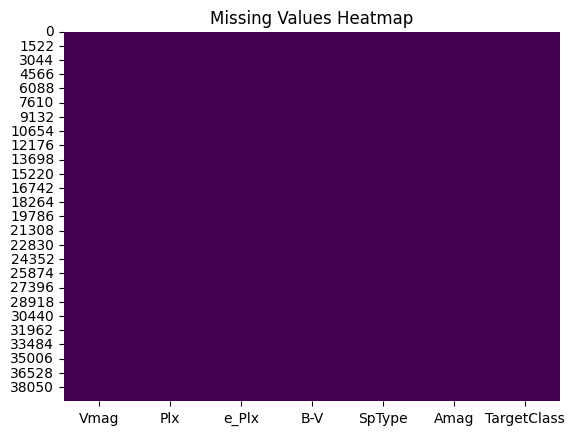

In [ ]:
#Analyze missing values ​​using heatmapplt.figure(figsize=(6,6))
sns.heatmap(ds.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


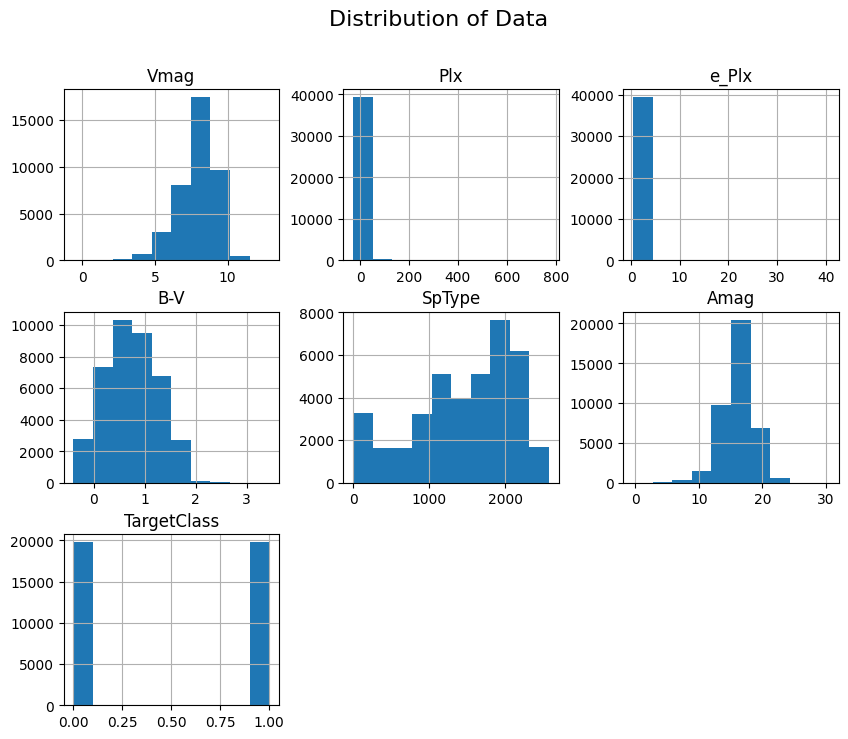

In [ ]:
ds.hist(figsize=(10,8))
plt.suptitle('Distribution of Data', fontsize=16)
plt.show()

<ipython-input-157-93ea2459e29b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TargetClass', data=ds, palette='coolwarm')


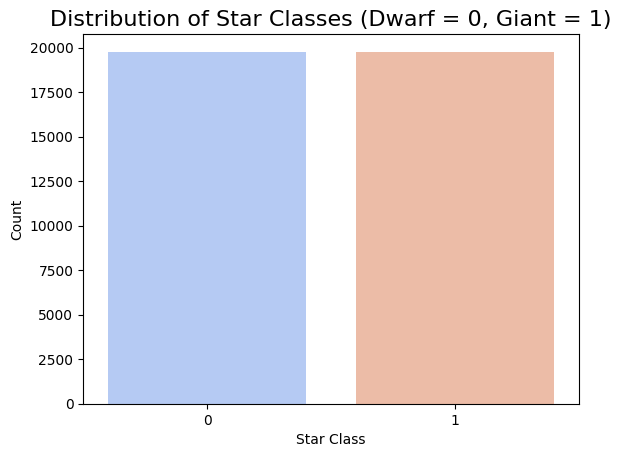

In [ ]:
#Display Distribution of TargetClass
sns.countplot(x='TargetClass', data=ds, palette='coolwarm')
plt.title('Distribution of Star Classes (Dwarf = 0, Giant = 1)', fontsize=16)
plt.xlabel('Star Class')
plt.ylabel('Count')
plt.show()

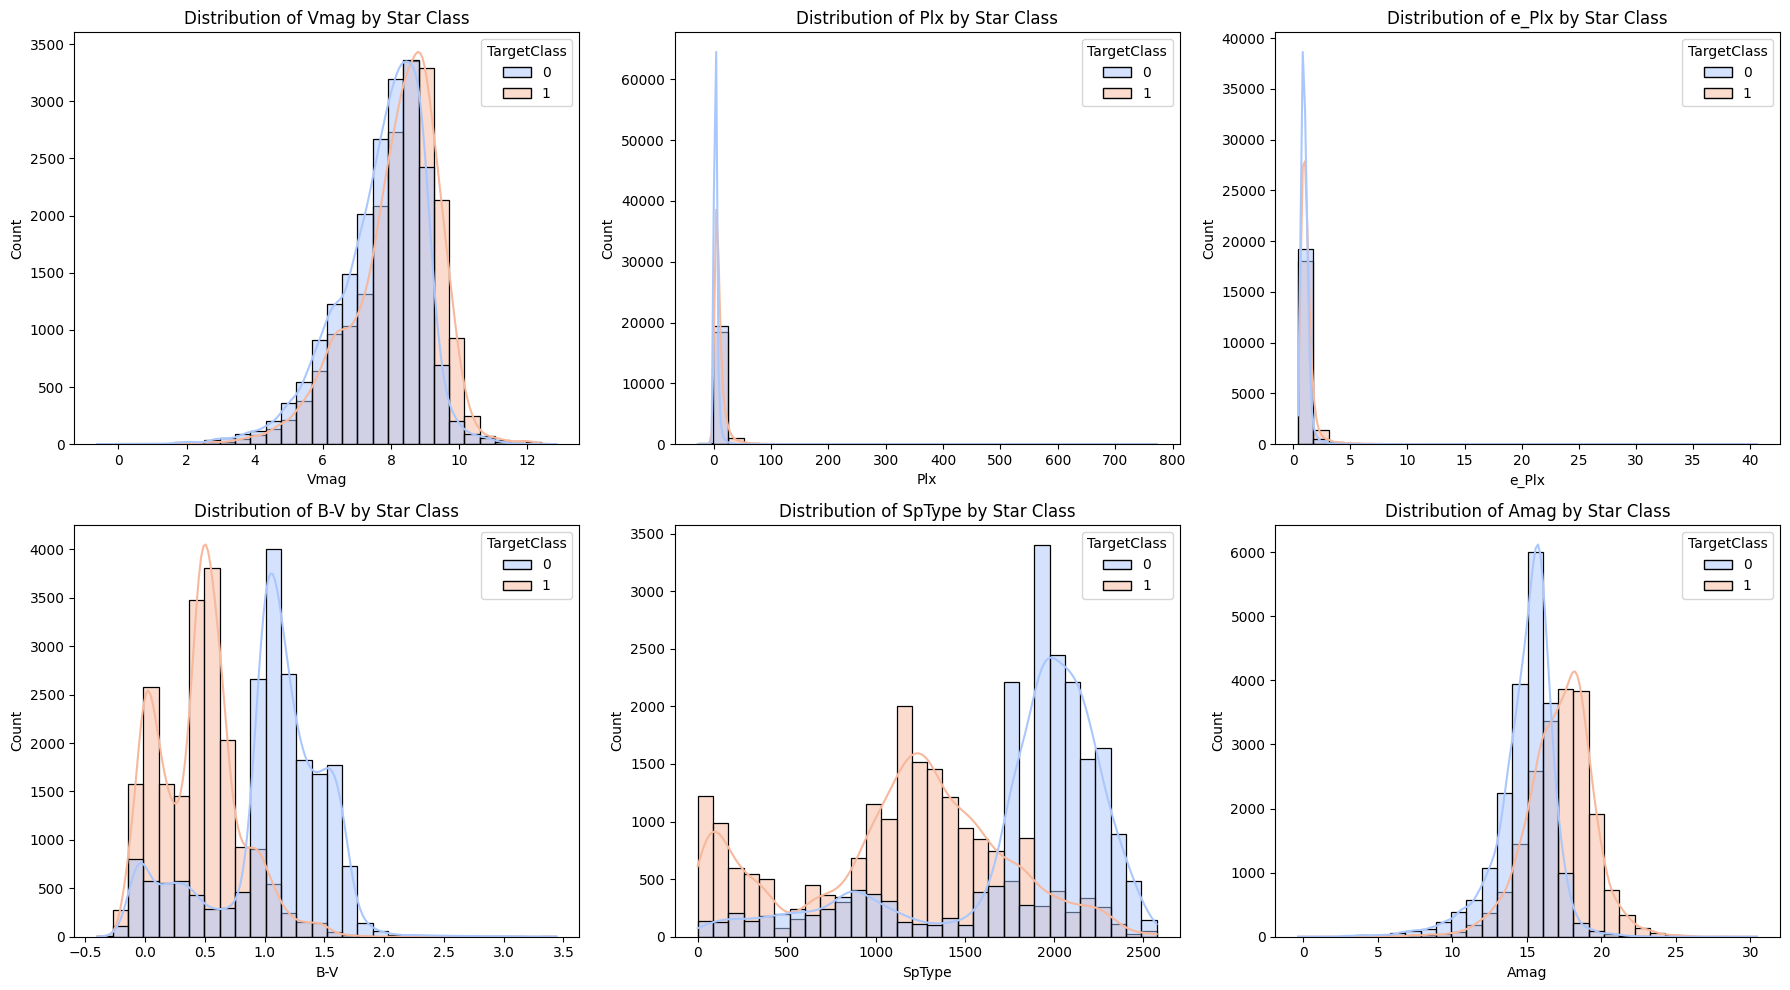

In [ ]:
# Plot Distributions of Features by Star Class

# Set up number of columns and rows for subplots
num_cols = 3
num_features = len(ds.columns) - 1  # Number of features excluding TargetClass
num_rows = -(-num_features // num_cols)  # Calculate number of rows needed using ceiling division

# Create the main figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))

# Plot feature distributions
for idx, column in enumerate(ds.columns[:-1]):  # Exclude TargetClass
    sns.histplot(data=ds, x=column, hue='TargetClass', kde=True, palette='coolwarm', bins=30, ax=axes.flat[idx])
    axes.flat[idx].set_title(f'Distribution of {column} by Star Class')

# Hide empty subplots
for ax in axes.flat[num_features:]:
    ax.set_visible(False)

# Adjust spacing between plots
plt.tight_layout()
plt.show()


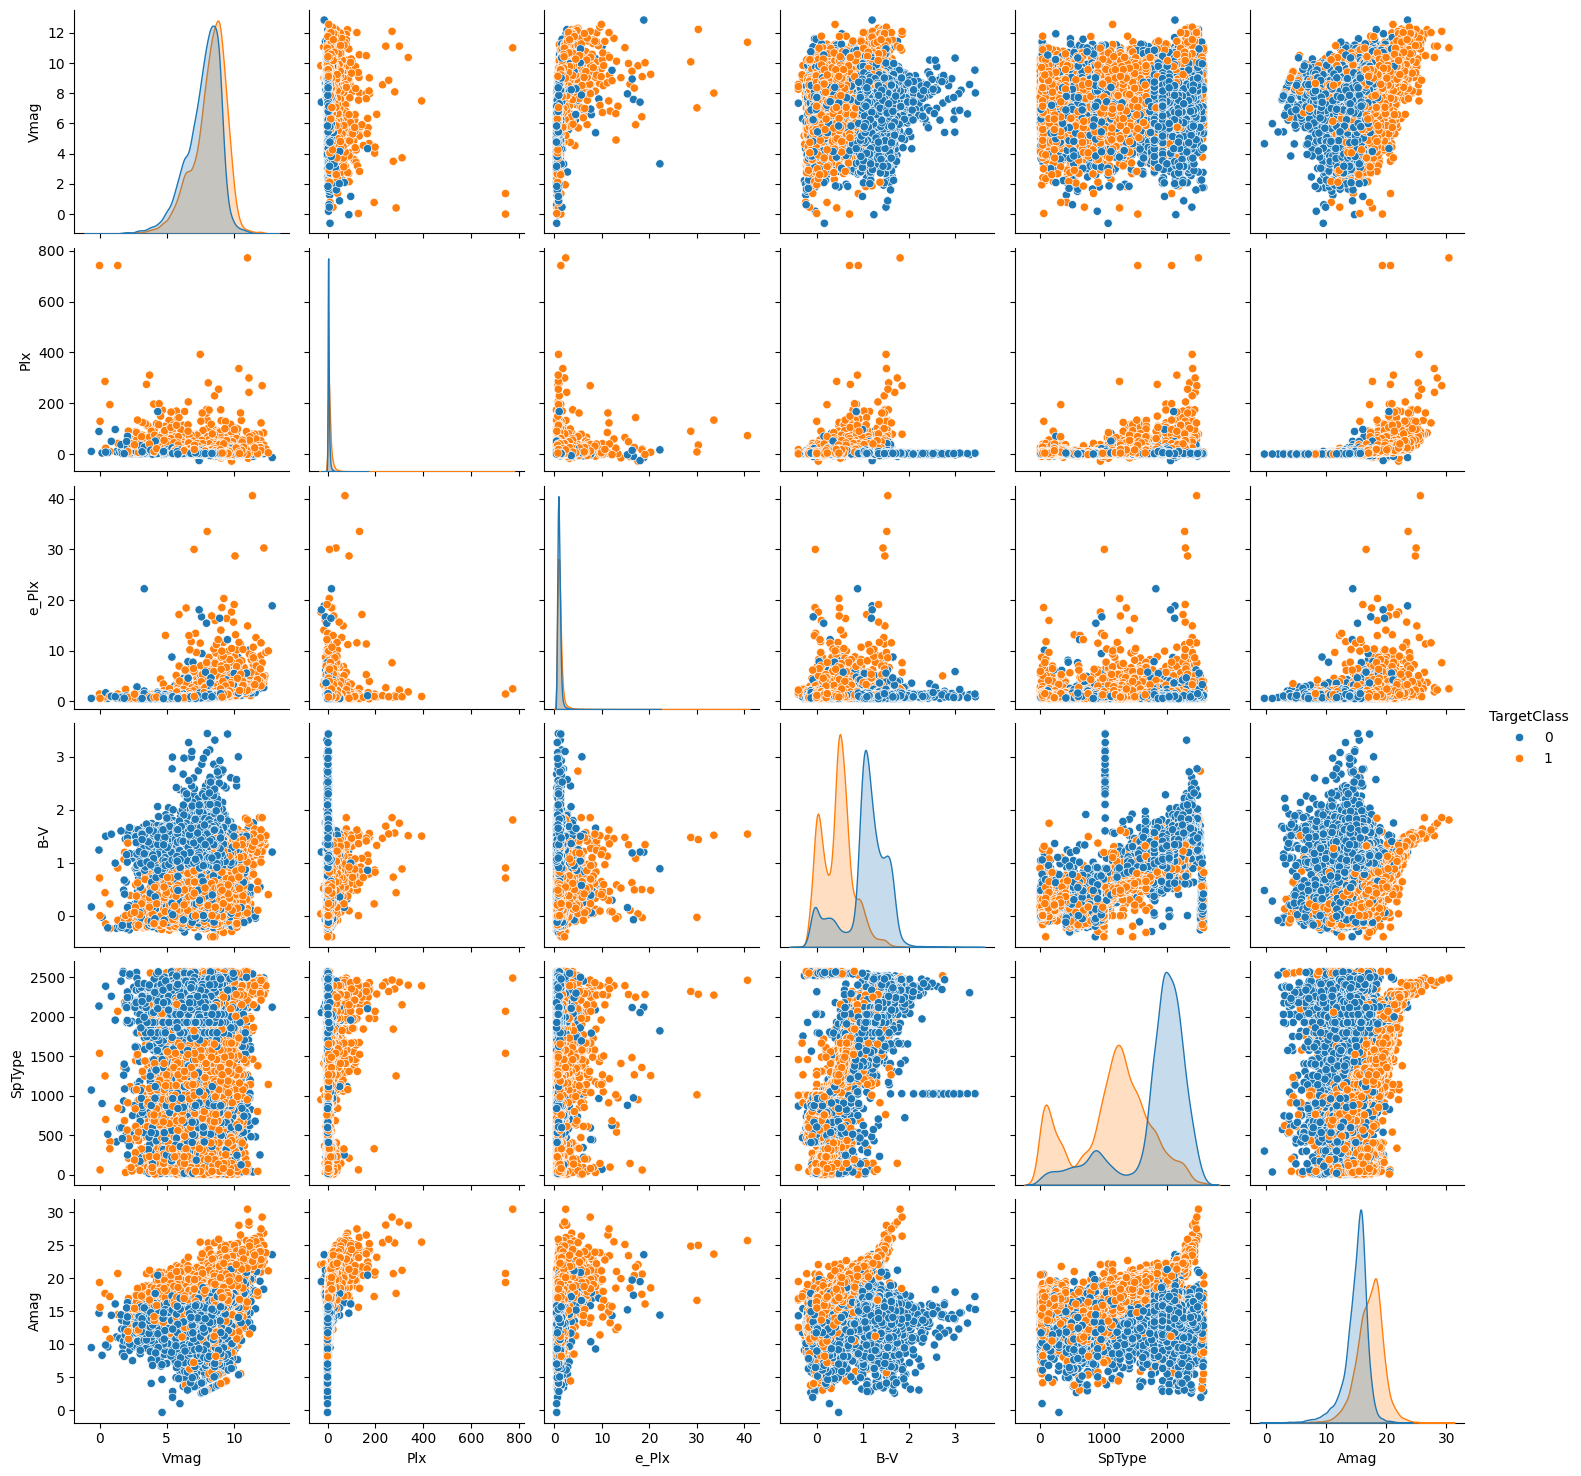

In [ ]:
#Plot Pairwise Relationships of Features Colored by Star Class
sns.pairplot(ds,hue='TargetClass')
plt.show()

<Figure size 1700x2000 with 0 Axes>

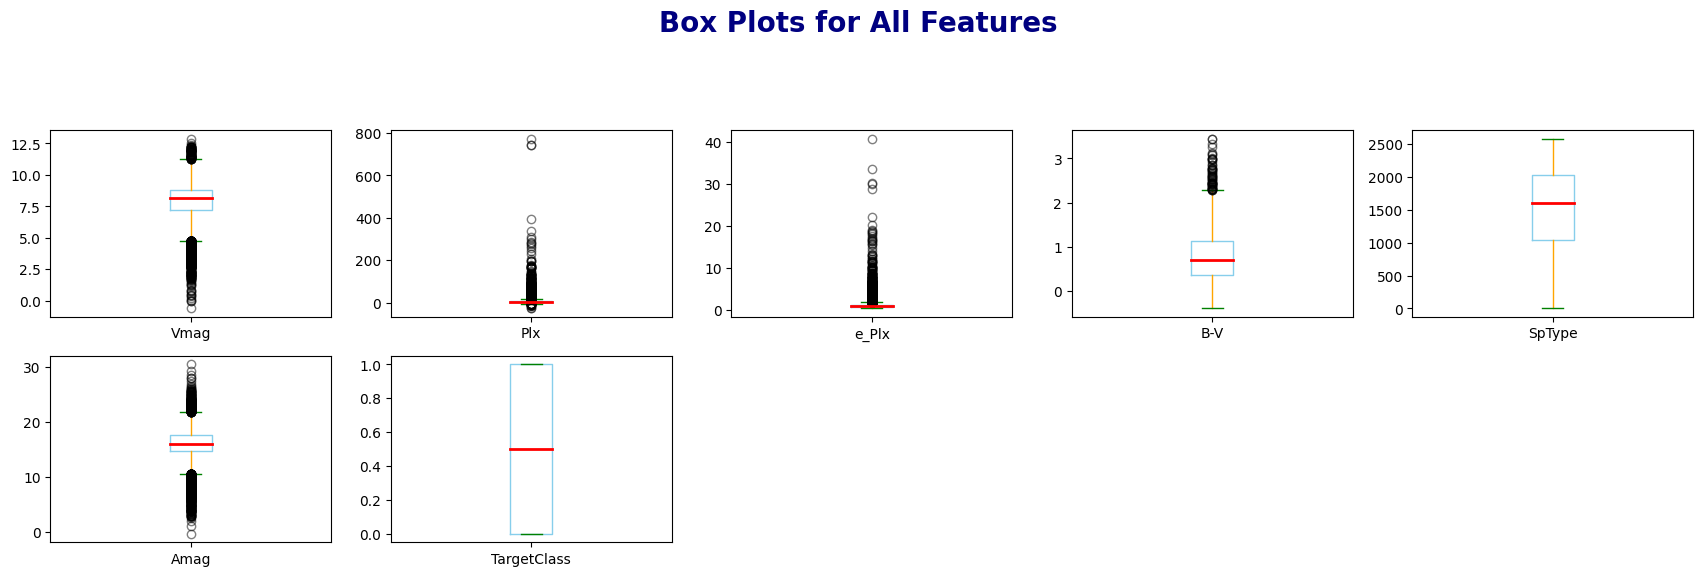

In [ ]:
# Create a box plot for each feature to visualize their distributions and identify outliers
plt.figure(figsize=(17, 20))
ds.plot(kind='box', subplots=True, layout=(8, 5),
        figsize=(17, 20),
        boxprops=dict(color="skyblue"),  # Box color
        whiskerprops=dict(color="orange"),  # Whisker color
        medianprops=dict(color="red", linewidth=2),  # Median color
        capprops=dict(color="green"),  # Cap color
        flierprops=dict(marker='o', alpha=0.5))  # Outlier

# Add a main title to the plot
plt.suptitle('Box Plots for All Features', fontsize=20, fontweight='bold', color='navy')

# Add titles to each subplot
for ax in plt.gcf().axes:
    ax.set_title(ax.get_label(), fontsize=12, fontweight='bold', color='darkblue')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()


In [ ]:
#Outlier Removal
ds=ds[ds['e_Plx']<ds['e_Plx'].quantile(0.9)]

<Figure size 1700x2000 with 0 Axes>

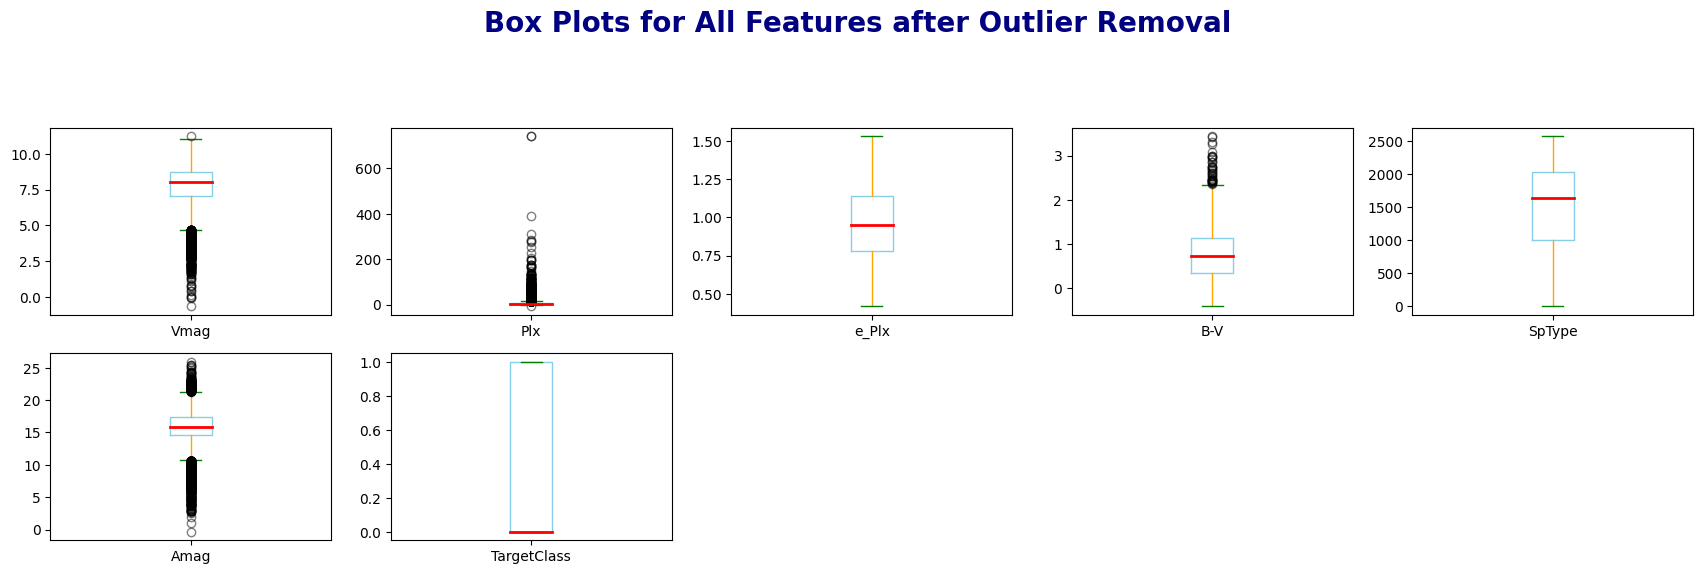

In [ ]:
plt.figure(figsize=(17, 20))
ds.plot(kind='box', subplots=True, layout=(8, 5),
        figsize=(17, 20),
        boxprops=dict(color="skyblue"),  # Box color
        whiskerprops=dict(color="orange"),  # Whisker color
        medianprops=dict(color="red", linewidth=2),  # Median color
        capprops=dict(color="green"),  # Cap color
        flierprops=dict(marker='o', alpha=0.5))  # Outlier

# Add a main title to the plot
plt.suptitle('Box Plots for All Features after Outlier Removal', fontsize=20, fontweight='bold', color='navy')

# Add titles to each subplot
for ax in plt.gcf().axes:
    ax.set_title(ax.get_label(), fontsize=12, fontweight='bold', color='darkblue')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()


# **Correlation Analysis** 🔄


In [ ]:
# Calculate the correlation matrix
correlation_matrix = ds.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 Vmag       Plx     e_Plx       B-V    SpType      Amag  \
Vmag         1.000000 -0.230965  0.573443  0.036559  0.054198  0.276850   
Plx         -0.230965  1.000000 -0.052963 -0.069608  0.010458  0.464207   
e_Plx        0.573443 -0.052963  1.000000  0.065711  0.069389  0.196259   
B-V          0.036559 -0.069608  0.065711  1.000000  0.876828 -0.133674   
SpType       0.054198  0.010458  0.069389  0.876828  1.000000 -0.025040   
Amag         0.276850  0.464207  0.196259 -0.133674 -0.025040  1.000000   
TargetClass  0.140297  0.266220  0.093564 -0.613673 -0.540799  0.470331   

             TargetClass  
Vmag            0.140297  
Plx             0.266220  
e_Plx           0.093564  
B-V            -0.613673  
SpType         -0.540799  
Amag            0.470331  
TargetClass     1.000000  


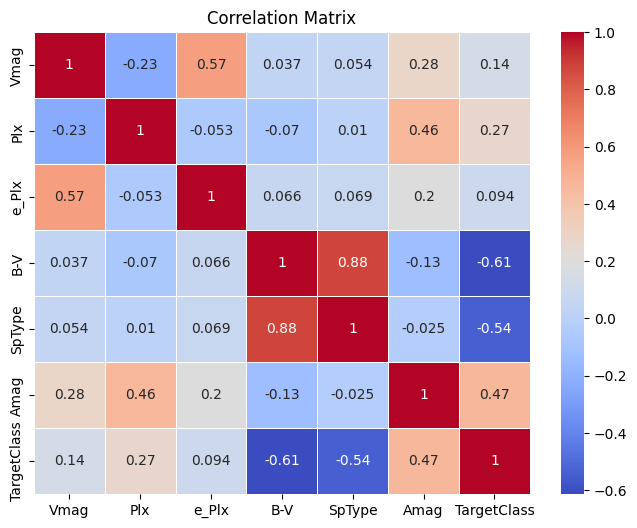

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **Model Training and Evaluation** 🚀


In [ ]:
#Extract features (X) and target variable (y) from the Dataset
x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [ ]:
#Display the shapes of x and y
print("Data Shapes:\n")
print("x.shape:", x.shape)
print("___________________\n")
print("y.shape:", y.shape)

Data Shapes:

x.shape: (35532, 6)
___________________

y.shape: (35532,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
# Create a DataFrame to display the shapes
shapes_data = {
    'Dataset': ['X_train', 'y_train', 'X_test', 'y_test'],
    'Shapes': [X_train.shape, y_train.shape, X_test.shape, y_test.shape]
}

print("Shapes of Training and Testing Sets:\n")
display(shapes_ds)

Shapes of Training and Testing Sets:



,Dataset,Shapes
0,X_train,"(26649, 6)"
1,y_train,"(26649,)"
2,X_test,"(8883, 6)"
3,y_test,"(8883,)"


In [ ]:
# Display a few samples from the training and testing sets
print("Training Set (X_train, y_train):")
print("X_train:\n", X_train)
print("______________________________________________________________________\n")
print("y_train:\n", y_train)
print("***********************************************************************\n")
print("Testing Set (X_test, y_test):")
print("X_test:\n", X_test)
print("______________________________________________________________________\n")
print("y_test:\n", y_test)
print("______________________________________________________________________\n")

Training Set (X_train, y_train):
X_train:
 [[6.7700000e+00 5.4300000e+00 7.3000000e-01 6.9000000e-02 6.3000000e+01
  1.5444000e+01]
 [8.9800000e+00 9.9000000e-01 1.0100000e+00 1.0980000e+00 2.5440000e+03
  1.3958176e+01]
 [9.2800000e+00 9.7000000e-01 9.8000000e-01 1.1810000e+00 2.1160000e+03
  1.4213859e+01]
 ...
 [7.9100000e+00 5.3700000e+00 1.1000000e+00 9.8900000e-01 1.9280000e+03
  1.6559872e+01]
 [8.8100000e+00 1.2900000e+00 1.4700000e+00 1.3000000e+00 2.0300000e+03
  1.4362949e+01]
 [5.3600000e+00 4.6500000e+00 8.8000000e-01 1.3190000e+00 2.0300000e+03
  1.3697266e+01]]
______________________________________________________________________

y_train:
 [1 0 0 ... 0 0 0]
***********************************************************************

Testing Set (X_test, y_test):
X_test:
 [[ 8.6800000e+00  5.9300000e+00  1.2500000e+00  4.0800000e-01
   1.1680000e+03  1.7545273e+01]
 [ 8.3600000e+00  3.6100000e+00  9.8000000e-01 -4.0000000e-02
   9.1000000e+02  1.6147537e+01]
 [ 9.7000000e+0

In [ ]:
# Initialize the machine learning models with their respective parameters
model1=RandomForestClassifier(max_depth=16,random_state=0)
model2=svm.LinearSVC(dual=False)
model3=DecisionTreeClassifier(random_state=0)
model4=GaussianNB()

# List of model names for easy reference
columns = ['RandomForestClassifier','SVM','DecisionTree','GaussianNB']

In [ ]:
#Initialize lists to store performance metrics
result1 = [] # List to store accuracy scores
result2 = [] # List to store precision scores
result3 = [] # List to store recall scores
result4 = [] # List to store F1 scores

In [ ]:
#Function to train the model, make predictions, and evaluate its performance
def call(model):
    model.fit(X_train, y_train)
    pre = model.predict(X_test)
    y_t = y_test
    y_p = pre

    # Evaluate the model and store the metrics
    accurecy = accuracy_score(y_t, y_p)
    recall = recall_score(y_t, y_p, average='weighted')
    precision = precision_score(y_t, y_p, average='weighted')
    f1 = f1_score(y_t, y_p, average='weighted')
    support = precision_recall_fscore_support(y_t, y_p, average='weighted')

    # Append metrics to the result lists
    result1.append(accurecy)
    result2.append(precision)
    result3.append(recall)
    result4.append(f1)

    algorithm_name = type(model).__name__  # Get algorithm name dynamically
    print(f"\n\n\n\n Classification Report for {algorithm_name}:\n")
    print(classification_report(y_t, y_p))


# Call the function for each model
call(model1)
call(model2)
call(model3)
call(model4)






 Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4768
           1       0.91      0.93      0.92      4115

    accuracy                           0.92      8883
   macro avg       0.92      0.92      0.92      8883
weighted avg       0.92      0.92      0.92      8883





 Classification Report for LinearSVC:

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4768
           1       0.86      0.89      0.87      4115

    accuracy                           0.88      8883
   macro avg       0.88      0.88      0.88      8883
weighted avg       0.88      0.88      0.88      8883





 Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4768
           1       0.94      0.93      0.94      4115

    accuracy               

In [ ]:
# Create a DataFrame with 'Algorithm' and 'Classification Report' columns
FinalResult = pd.DataFrame({'Algorithm': columns,'Accuracy': result1,'precision':result2,'Recall': result3, 'F1-Score':
                         result4})
# Display the DataFrame
display(FinalResult)

,Algorithm,Accuracy,precision,Recall,F1-Score
0,RandomForestClassifier,0.922549,0.922903,0.922549,0.922604
1,SVM,0.881684,0.882603,0.881684,0.881809
2,DecisionTree,0.940786,0.940778,0.940786,0.940768
3,GaussianNB,0.870202,0.871316,0.870202,0.870348


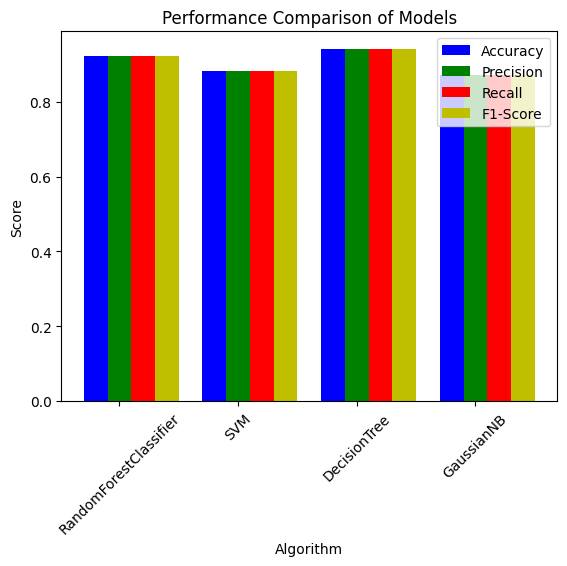

In [ ]:
#Create a bar plot
bar_width = 0.2
index = np.arange(len(columns))

# Plot bars for each metric
plt.bar(index, result1, bar_width, label='Accuracy', color='b')
plt.bar(index + bar_width, result2, bar_width, label='Precision', color='g')
plt.bar(index + 2 * bar_width, result3, bar_width, label='Recall', color='r')
plt.bar(index + 3 * bar_width, result4, bar_width, label='F1-Score', color='y')

# Add labels and title
plt.title('Performance Comparison of Models')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(index + bar_width, columns, rotation=45)
plt.legend()
plt.show()


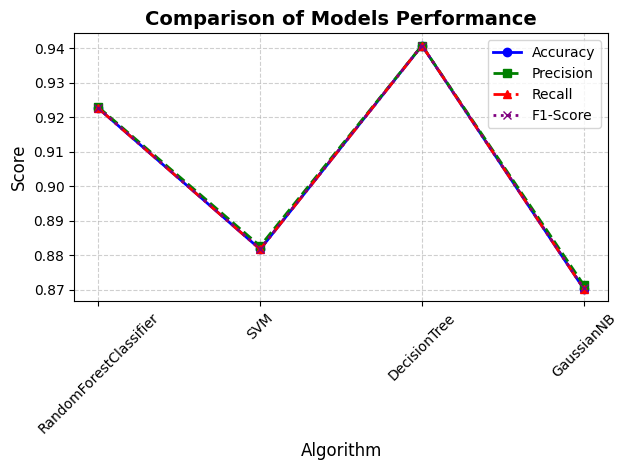

In [ ]:
# Plot the performance metrics with different line styles and thickness
plt.plot(FinalResult.Algorithm, result1, label="Accuracy", linestyle='-', linewidth=2, marker='o', color='blue')
plt.plot(FinalResult.Algorithm, result2, label="Precision", linestyle='--', linewidth=2, marker='s', color='green')
plt.plot(FinalResult.Algorithm, result3, label="Recall", linestyle='-.', linewidth=2, marker='^', color='red')
plt.plot(FinalResult.Algorithm, result4, label="F1-Score", linestyle=':', linewidth=2, marker='x', color='purple')

# Customize the plot
plt.legend()
plt.title('Comparison of Models Performance', fontsize=14, fontweight='bold')
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
